## Project
    - Retrival Augmented Generation (RAG)
    - Build Chatbot
    
- document loading: 80 unique loades LangChain provides
- Document splitting: best practices in document splitting
- Vector stores and embeddings: vector store integrations with LangChain
- Retrival: accessing and indexing data in vector store
- Question Answering: 
- Chat: chatbot using LangChain

## LangChain
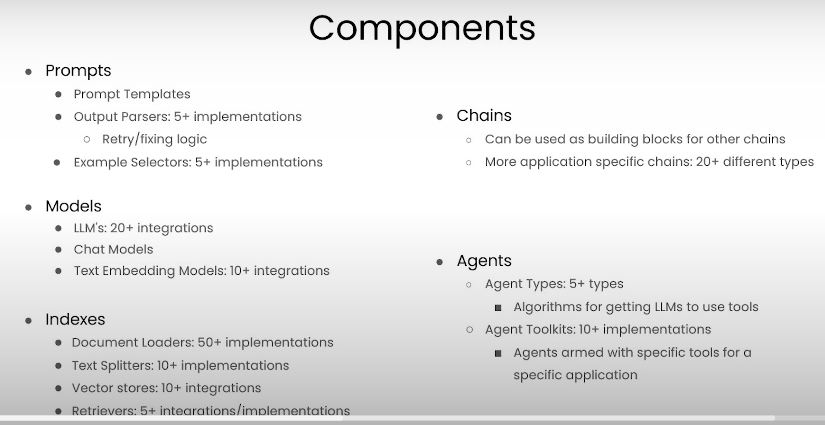

- How to load data
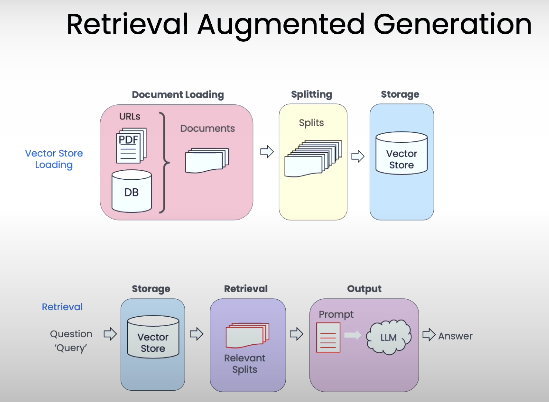
- document -> splitting document -> storing in vector databases
- symanic search
- memory: fully functional data

## 1. Document loading
- 80 document loders
    - Accessing and converting data
    - from websites, databases, youtube, pdf, html, json, word, etc
    - return a list of document objects
    
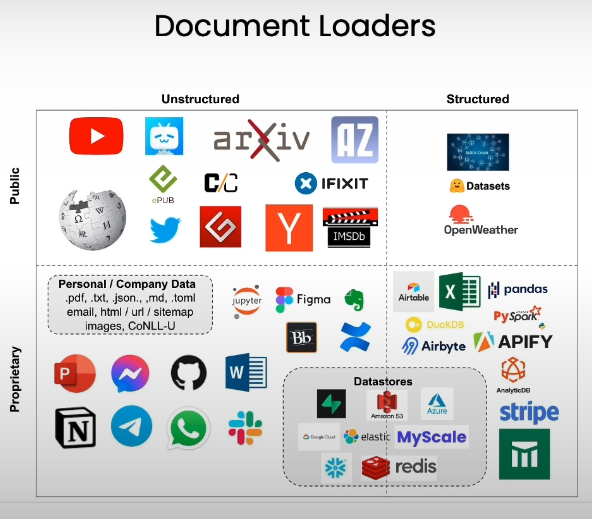

In [ ]:

from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader('doc_path')
pages = loader.load()

# load the list of documents
len(pages) #prints the number of pages

page = pages[0]
print(page.page_content[:500])

page.metadata # to access the metadata of the page

## 2. Document Splitting
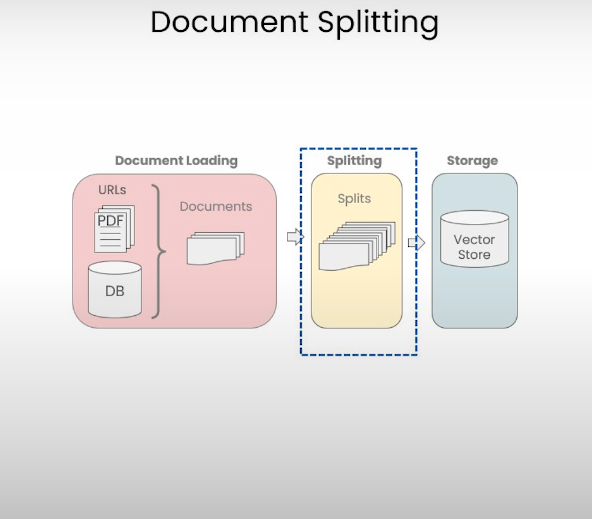
- the context window is limitted (specific number of tokens)
- we need to send only the relevant docs to the model

- splitting
    - chunk size
    - chunk overlap: shares in 2 chunks

### Methods
- create_documnet(): create documents from a list of text
- split_documents(): splits documents


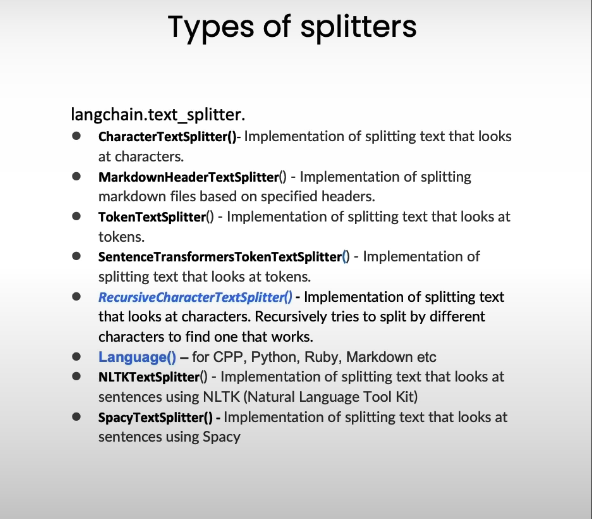

In [ ]:
import os
import openai
import sys

openai.aip_key = os.environ['OPEN_API_KEY']

from langchain.text_splitter import RecursiveCharacterTextSplitter

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=26,
    chunk_overlap=4,
    seperators=['\n\n', '\n', '(?<=\. )', ' ', ''] # optional argument
)
# (?<=\.) a look behind regex
text = 'some text'

r_splitter.split_text(text)

### Token Text splitter
- often LLMs has restriction of context window on number of tokens

In [ ]:
from langchain.text_splitter import TokenSplitter

t_splitter(
    chunk_size = 10
    chunk_overlap = 0
    
)

text = 'some text'

t_splitter.split_text(text)
docs = t_splitter.split_documents(text) # return documents
    # Source and Meta-data included with the doucments

## 3. Vector Store & Embeddings
- index the split doc, to retrieve them to answer the questions

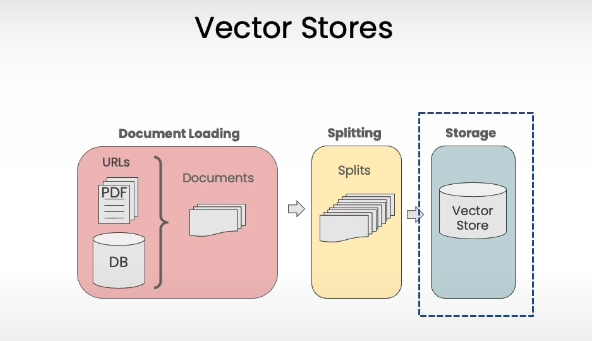

- Building chatbots

- reson for embeddings
    - embedding vectors captures meaning
    - similar text has similar vectors
    - can find similar vectors

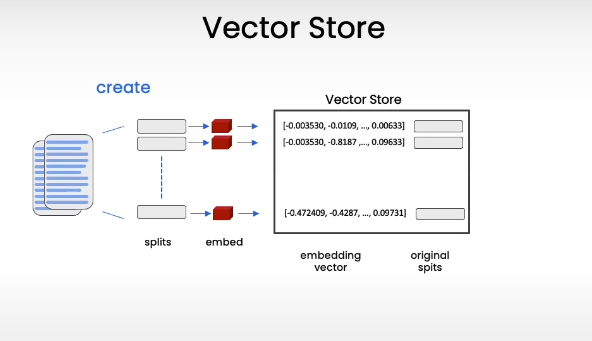

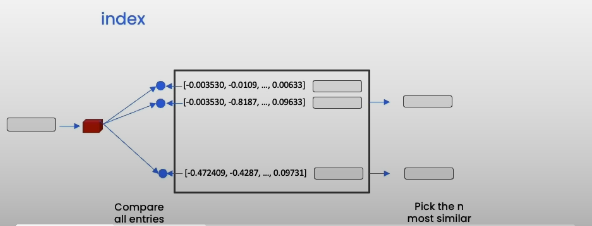

- pass the similar vectors to LLMs to give context

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

sentence1 = 'sentence 1'
sentence2 = 'sentence 2'
sentence3 = 'sentence 3'

embeddings1 = embeddings.embed_query(sentence1)

# push the data into vector store
from langchain.vectorstores import Chroma

persist_directory = 'docs/chroma'

vectordb = Chroma.from_documents(
    documents = splits,
    embeddings = embedding,
    persist_directory = persist_directory
)

print(vectordb._collection.count())

question = 'is there an email i can ask for help'

docs =  vectordb.similarity_search(question, k=3)

vectordb.persist()
# to use the data for future use
# need to explore more

## 4. Retrieval

